<a href="https://colab.research.google.com/github/govardhan2022/CV/blob/main/CV_Edge_canny_%2Clog%2Cdog_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

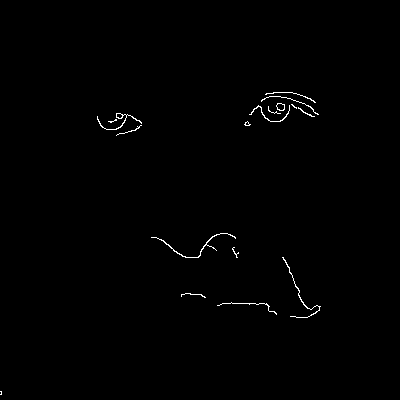

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load an image
image = cv2.imread('/content/ravi.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 100, 200)  # Adjust the threshold values as needed

# Display the result
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

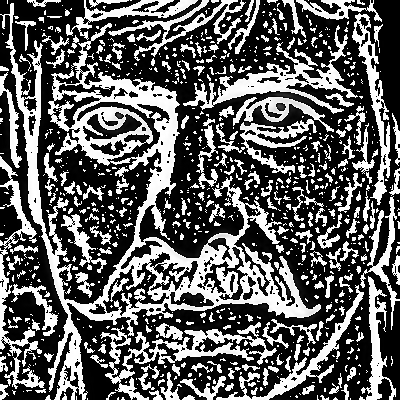

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load an image
image = cv2.imread('/content/ravi.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blurs with two different sigma values
sigma1 = 1.0
sigma2 = 3.0
gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)

# Calculate the DoG by subtracting the two blurred images
dog = gaussian1 - gaussian2

# Display the result
cv2_imshow(dog)
cv2.waitKey(0)
cv2.destroyAllWindows()


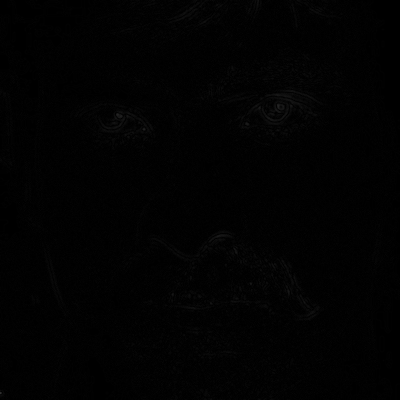

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load an image
image = cv2.imread('/content/ravi.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator to the blurred image
log = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert the result to 8-bit for display
log = cv2.convertScaleAbs(log)

# Display the result
cv2_imshow(log)
cv2.waitKey(0)
cv2.destroyAllWindows()


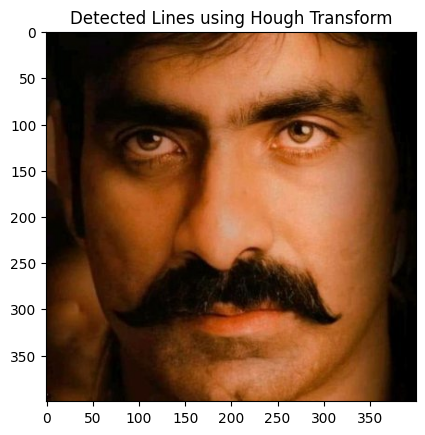

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Canny edge detection as a preprocessing step
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Use Hough transform to detect lines
    # cv2.HoughLines(image, rho, theta, threshold)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    if lines is not None:
      for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Changed to thick red line


    # Show the result using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines using Hough Transform')
    plt.show()

# Call the function with your image path
image_path = "/content/ravi.jpg"
detect_lines(image_path)